In [47]:
#1 Series 物件
import pandas as pd
years = range(2021, 2026)
nums = pd.Series([400, 420, 450, 480, 500], index = years)
nums

2021    400
2022    420
2023    450
2024    480
2025    500
dtype: int64

In [46]:
#2 Dataframe
import pandas as pd
datas = {'state':['North America', 'south America', 'Europ', 'Africa', 'Asia'],
            'population':['3.8', '6.2', '7.4', '12.28', '45.45']}

data = pd.DataFrame(datas, columns=['population'], index = datas['state'])
data


,population
North America,3.8
south America,6.2
Europ,7.4
Africa,12.28
Asia,45.45


In [45]:
#3 將上一題增加欄位 顯示累計值
import pandas as pd
datas = {'state':['North America', 'south America', 'Europ', 'Africa', 'Asia'],
            'population':[3.8, 6.2, 7.4, 12.28, 45.45]}
df = pd.DataFrame(datas, columns=['population'], index = datas['state'])

y = df['population'].cumsum()
df['cum_population'] = y

data

,population,cum_population
North America,3.80,3.80
south America,6.20,10.00
Europ,7.40,17.40
Africa,12.28,29.68
Asia,45.45,75.13


In [44]:
#4
import pandas as pd
import twstock

stock2330 = twstock.realtime.get('2330')
buyPrice = stock2330['realtime']['best_bid_price']
buyNum = stock2330['realtime']['best_bid_volume']
selPrice = stock2330['realtime']['best_ask_price']
selNum = stock2330['realtime']['best_ask_volume']

dict2330 = {'BVolumn':buyNum,
            'Buy':buyPrice,
            'Sell':selPrice,
            'SVolumn':selNum}

df2330 = pd.DataFrame(dict2330, index=range(1,6))
print("台積電最佳五檔價量表")
df2330



台積電最佳五檔價量表


,BVolumn,Buy,Sell,SVolumn
1,225,514.0000,515.0000,756
2,391,513.0000,516.0000,160
3,501,512.0000,517.0000,147
4,396,511.0000,518.0000,152
5,880,510.0000,519.0000,562


In [31]:
#5
import pandas as pd
import numpy as np
course = ['Chinese', 'English', 'Math', 'Natural', 'Society']

chinese = [14, 12, 13, 10, 13]
english = [13, 14, 11, 10, 15]
math = [15, 9, 12, 8, 15]
natural = [15, 10, 13, 10, 15]
society = [12, 11, 14, 9, 14]

df = pd.DataFrame([chinese, english, math, natural, society], columns = course, index = range(1,6))

#計算總分
total = [df.iloc[i].sum() for i in range(0, 5)]
#併入表格
df['Total'] = total


#計算各科平均
#ave = df.mean()
#增加index 併入表格
#df.loc['Average'] = ave

#排序
df = df.sort_values(by = 'Total', ascending = False)
rank = range(1, 6)
df['Ranking'] = rank

#處理成績一樣的排序
for i in range(1,5):
    if df.iat[i, 5] == df.iat[i-1, 5]:
        df.iat[i, 6] = df.iat[i-1, 6]

#依照index重新排序
df = df.sort_index()

#最後才算平均 平均才不會被納入排序
ave = df.mean()
df.loc['Average'] = ave
df.iat[5,6] = np.nan

df

#輸出檔案
df.to_csv('ex25_5.csv')

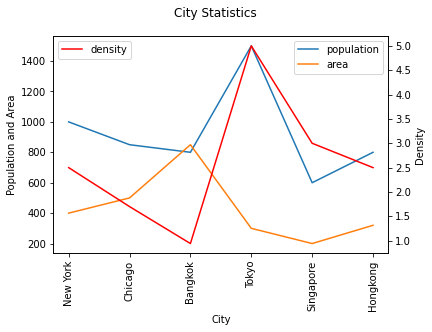

In [43]:
#6 雙軸
import pandas as pd
import matplotlib.pyplot as plt

cities = {'population':[1000, 850, 800, 1500, 600, 800],
            'area':[400, 500, 850, 300, 200, 320],
            'town':['New York', 'Chicago', 'Bangkok', 'Tokyo', 'Singapore', 'Hongkong']}
df = pd.DataFrame(cities, columns=['population','area','density'], index=cities['town'])

density = df['population'].div(cities['area'])
df['density'] = density
df

#雙軸圖表設定
fig, ax = plt.subplots()
fig.suptitle('City Statistics')
ax.set_ylabel('Population and Area')
ax.set_xlabel('City')
ax2 = ax.twinx()
ax2.set_ylabel('Density')
df['population'].plot(ax = ax, rot = 90)
df['area'].plot(ax = ax, rot = 90)
df['density'].plot(ax = ax2, style = 'r-')
ax.legend(loc = 1)
ax2.legend(loc = 2)
plt.show()

In [50]:
#7
import requests

url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'
try:
    htmlfile = requests.get(url)
    print('下載成功')
except Exception as err:
    print('下載失敗')

fn = 'iris.csv'
with open(fn, 'wb') as fileObj:
    for diskstorage in htmlfile.iter_content(10240):
        size = fileObj.write(diskstorage)

下載成功


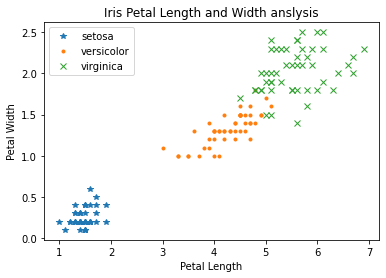

In [62]:
import pandas as pd

colName = ['sepal_len', 'sepal_wd', 'petal_len', 'petal_wd', 'species']
iris = pd.read_csv('iris.csv', names = colName)


#擷取不同品種的鳶尾花
iris_setosa = iris[iris['species'] == 'Iris-setosa']
iris_versicolor = iris[iris['species'] == 'Iris-versicolor']
iris_virginica = iris[iris['species'] == 'Iris-virginica']

plt.plot(iris_setosa['petal_len'], iris_setosa['petal_wd'], '*', label = 'setosa')
plt.plot(iris_versicolor['petal_len'], iris_versicolor['petal_wd'], '.', label = 'versicolor')
plt.plot(iris_virginica['petal_len'], iris_virginica['petal_wd'], 'x', label = 'virginica')

plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.title('Iris Petal Length and Width anslysis')
plt.legend()
plt.show()
